In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# set the color palet to pastel
sns.set_palette("pastel")

In [3]:
df = pd.read_csv('san-diego-weather.csv')

In [11]:
df.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN,TOBS
12574,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2017-06-01,60.0,70.0,55.0,NaN
12575,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2017-06-02,66.0,83.0,56.0,NaN
12576,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2017-06-03,69.0,81.0,58.0,NaN
12577,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2017-06-04,67.0,79.0,58.0,NaN
12578,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2017-06-05,63.0,78.0,53.0,NaN


In [10]:
# print % of TAVG that are NaN
print('Percent NaN:', df['TAVG'].isna().sum() / len(df))

Percent NaN: 0.0


In [17]:
# convert DATE to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [9]:
# drop columns with NaN in TAVG
df = df.dropna(subset=['TAVG'])

In [32]:
# create a new dataframe, where name = "SAN DIEGO INTERNATIONAL AIRPORT, CA US"
df_daily = df[df['NAME'] == "SAN DIEGO INTERNATIONAL AIRPORT, CA US"]

<Axes: >

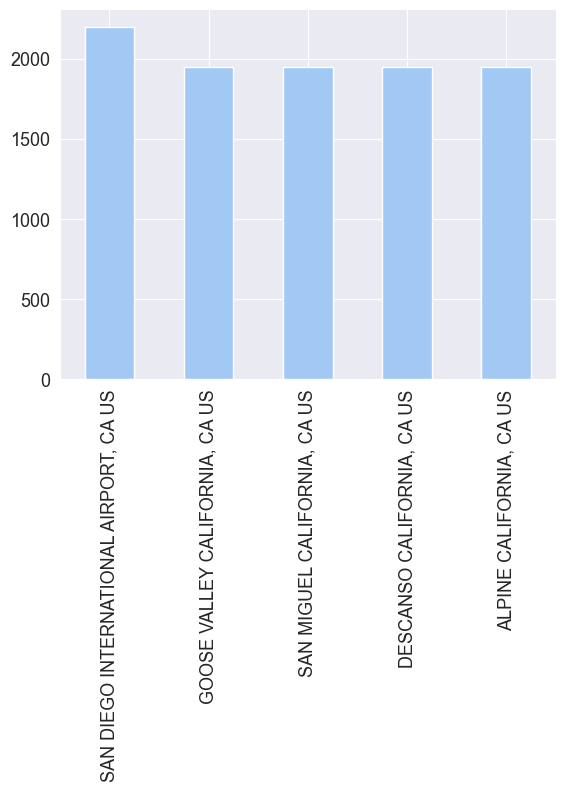

In [59]:
# plot histogram for count of unique NAME values
df['NAME'].value_counts().plot(kind='bar')

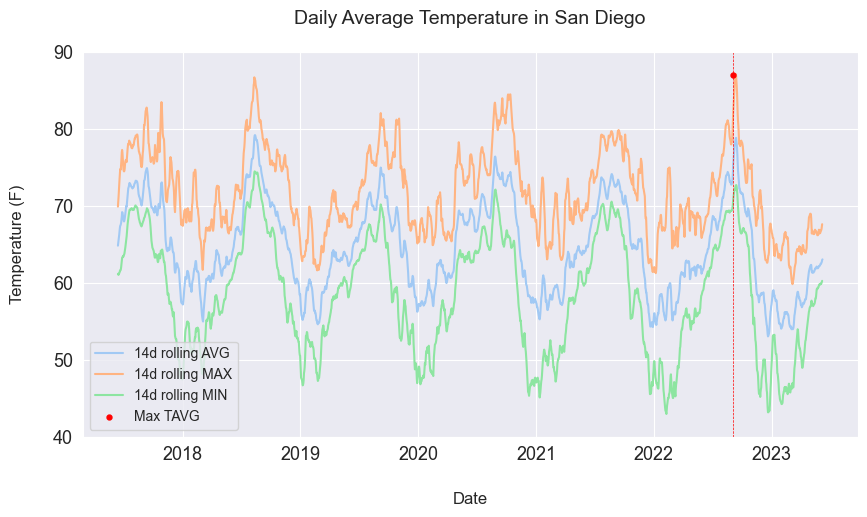

In [100]:
# scatter TAVG and date
plt.figure(figsize=(10, 5))
# plt.plot(df_daily["DATE"], df_daily['TAVG'], label='TAVG')
# plt.plot(df_daily["DATE"], df_daily['TMAX'], label='TMAX')
# plt.plot(df_daily["DATE"], df_daily['TMIN'], label='TMIN')
# plot the 180 day rolling mean
N_DAY = 14

plt.plot(df_daily["DATE"], df_daily['TAVG'].rolling(N_DAY).mean(), label=f'{N_DAY}d rolling AVG')
plt.plot(df_daily["DATE"], df_daily['TMAX'].rolling(N_DAY).mean(), label=f'{N_DAY}d rolling MAX')
plt.plot(df_daily["DATE"], df_daily['TMIN'].rolling(N_DAY).mean(), label=f'{N_DAY}d rolling MIN')

# add a point for the max temparature for tavg 
max_date = df_daily[df_daily['TAVG'] == df_daily['TAVG'].max()]['DATE'].values[0]

max_date = pd.to_datetime(max_date, format='%Y-%m-%d')

max_temp = df_daily[df_daily['TAVG'] == df_daily['TAVG'].max()]['TAVG'].values[0]

plt.scatter(max_date, max_temp, label=f'Max TAVG', color='red', s=50, marker='.', zorder=10)
# add a vertical line and a xlabel for the max temparature for tavg
plt.axvline(x=max_date, color='red', linestyle='--', linewidth=0.5)

plt.xlabel('Date', fontsize=12, labelpad=20)
plt.ylabel('Temperature (F)', fontsize=12, labelpad=20)
plt.title('Daily Average Temperature in San Diego', fontsize=14, pad=20)
plt.ylim(40, 90)
plt.legend(loc='lower left', fontsize=10)
plt.show()

In [40]:
# print the date of the hottest day in for TAVG
print('Hottest day:', df_daily[df_daily['TAVG'] == df_daily['TAVG'].max()]['DATE'])

Hottest day: 118863   2022-09-04
Name: DATE, dtype: datetime64[ns]
